In [1]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

In [2]:
model_trained = YOLO('best.pt')
images = []
for i in range(6):
    images.append(f'parkingImage{i+1}.jpg')
    
results_trained = model_trained(source=images, show=False, conf=0.4, save=True, imgsz=416, show_labels=False, show_conf=False, line_width=1)


0: 416x416 30 space-emptys, 74 space-occupieds, 1: 416x416 30 space-emptys, 75 space-occupieds, 2: 416x416 2 space-emptys, 27 space-occupieds, 3: 416x416 28 space-emptys, 1 space-occupied, 4: 416x416 95 space-emptys, 7 space-occupieds, 5: 416x416 100 space-emptys, 1 space-occupied, 274.4ms
Speed: 2.0ms preprocess, 45.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\predict22


In [3]:
results_trained[0].names

{0: 'space-empty', 1: 'space-occupied'}

In [4]:
def calculate_class_counts(result):
    class_counts = {}
    if result.boxes is not None:
        for class_id in result.boxes.cls:
            class_id = int(class_id)
            class_name = result.names[class_id]

            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

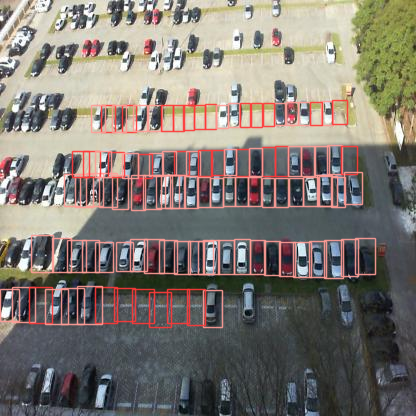

Class space-occupied: 74 objects
Class space-empty: 30 objects


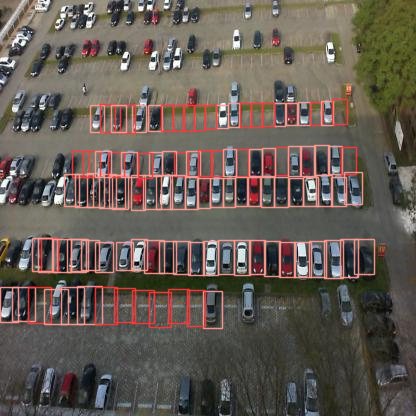

Class space-occupied: 75 objects
Class space-empty: 30 objects


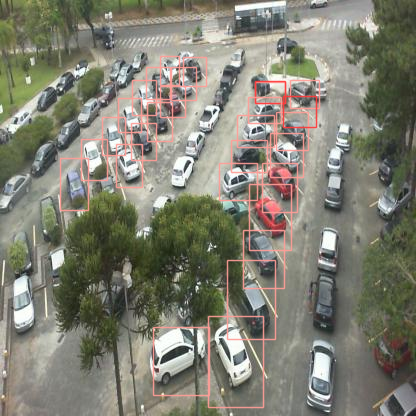

Class space-occupied: 27 objects
Class space-empty: 2 objects


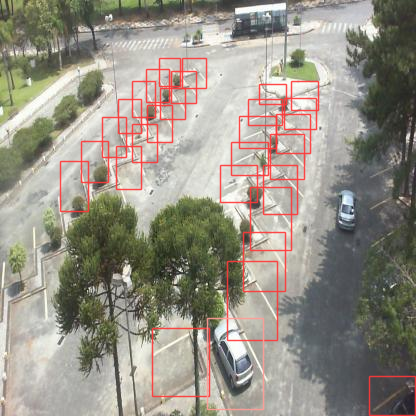

Class space-occupied: 1 objects
Class space-empty: 28 objects


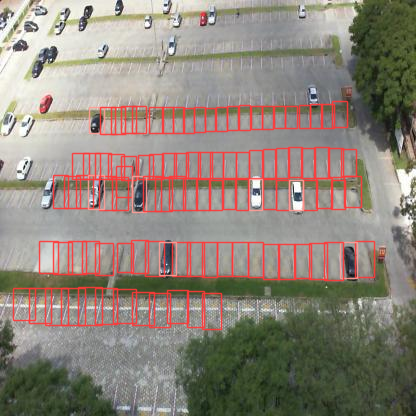

Class space-empty: 95 objects
Class space-occupied: 7 objects


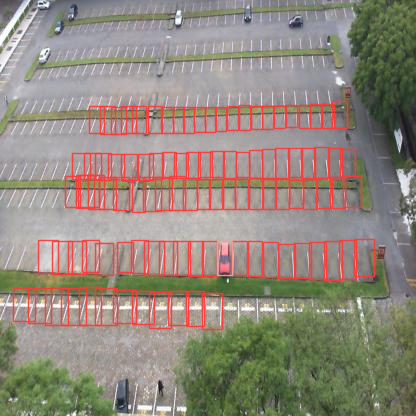

Class space-empty: 100 objects
Class space-occupied: 1 objects


In [5]:
for r in results_trained:
    class_counts = calculate_class_counts(r)
    im_array = r.plot(labels=False, line_width=1, conf=False)
    im = Image.fromarray(im_array[..., ::-1])  
    display(im)
    for class_name, count in class_counts.items():
        print(f"Class {class_name}: {count} objects")